In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data source: https://www.bgc-jena.mpg.de/wetter/

df = pd.read_csv("weather.csv")

In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m≤),PAR (µmol/m≤/s),max. PAR (µmol/m≤/s),Tlog (degC),CO2 (ppm)
0,01.07.2020 00:10:00,983.85,16.17,290.67,10.63,69.68,18.41,12.83,5.58,8.15,...,1.27,2.12,194.0,0.0,0,0.0,0.0,0.0,25.08,422.1
1,01.07.2020 00:20:00,983.72,15.90,290.41,10.66,71.02,18.09,12.85,5.24,8.17,...,1.91,2.84,197.1,0.0,0,0.0,0.0,0.0,25.03,422.9
2,01.07.2020 00:30:00,983.65,15.69,290.21,10.65,71.92,17.85,12.84,5.01,8.16,...,1.30,2.05,213.3,0.0,0,0.0,0.0,0.0,24.97,423.8
3,01.07.2020 00:40:00,983.58,15.56,290.08,10.68,72.68,17.70,12.87,4.84,8.18,...,1.20,2.16,222.9,0.0,0,0.0,0.0,0.0,24.90,424.6
4,01.07.2020 00:50:00,983.58,15.64,290.16,10.68,72.31,17.80,12.87,4.93,8.18,...,0.89,2.60,220.3,0.0,0,0.0,0.0,0.0,24.83,423.5


In [4]:
df.shape

(14031, 22)

In [5]:
#subsampling the dataset from 10-min intervals to 1-hour intervals:

df = df[5::6].reset_index(drop=True)

In [6]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m≤),PAR (µmol/m≤/s),max. PAR (µmol/m≤/s),Tlog (degC),CO2 (ppm)
0,01.07.2020 01:00:00,983.48,15.55,290.08,10.71,72.88,17.69,12.89,4.80,8.20,...,0.85,1.84,205.9,0.0,0,0.00,0.00,0.00,24.77,425.0
1,01.07.2020 02:00:00,983.35,15.48,290.02,10.88,74.02,17.61,13.04,4.58,8.29,...,1.77,2.46,214.4,0.0,0,0.00,0.00,0.00,24.46,428.0
2,01.07.2020 03:00:00,983.21,15.50,290.05,10.97,74.38,17.64,13.12,4.52,8.34,...,1.37,2.68,212.4,0.0,0,0.00,0.00,0.00,24.18,425.3
3,01.07.2020 04:00:00,983.22,15.74,290.29,11.02,73.48,17.91,13.16,4.75,8.37,...,1.74,2.43,202.7,0.0,0,0.00,5.09,7.45,24.00,422.4
4,01.07.2020 05:00:00,983.32,15.86,290.40,11.28,74.19,18.05,13.39,4.66,8.51,...,1.68,2.51,204.4,0.0,0,49.51,91.06,103.73,24.24,428.8


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),2338.0,988.553991,6.722326,964.64,985.0725,989.725,992.5700,1002.29
T (degC),2338.0,18.100372,5.592306,2.83,14.2725,18.110,21.7900,34.58
Tpot (K),2338.0,292.212399,5.586209,278.05,288.3125,292.070,295.9175,308.75
Tdew (degC),2338.0,11.060573,3.623319,2.83,8.2600,10.910,13.6700,20.13
rh (%),2338.0,67.367844,21.155475,23.60,49.7600,67.625,85.6750,100.00
VPmax (mbar),2338.0,21.953332,7.919531,7.49,16.2925,20.820,26.1400,55.00
VPact (mbar),2338.0,13.538683,3.329580,7.49,10.9300,13.065,15.6675,23.61
VPdef (mbar),2338.0,8.414491,7.594570,0.00,2.3600,6.505,12.6500,41.16
sh (g/kg),2338.0,8.567344,2.123527,4.80,6.9000,8.280,9.9100,14.99
H2OC (mmol/mol),2338.0,13.697956,3.375918,7.69,11.0500,13.250,15.8400,23.88


In [8]:
#1. EDA & Data Preparation

In [9]:
#convert date string to datetime type and remove from dataframe

datetime = pd.to_datetime(df['Date Time'])
df = df.drop(columns=['Date Time'])

In [10]:
#convert wind velocity, max wind velocity and wind direction to wind vector

df['wd_rad'] = df['wd (deg)']*np.pi/180 #convert wd to radians

df['wx'] = df['wv (m/s)']*np.cos(df['wd_rad']) #calculate the wind x and y components
df['wy'] = df['wv (m/s)']*np.sin(df['wd_rad'])

df['max wx'] = df['max. wv (m/s)']*np.cos(df['wd_rad']) #calculate the wind x and y components
df['max wy'] = df['max. wv (m/s)']*np.sin(df['wd_rad'])

In [11]:
df = df.drop(columns=['wd (deg)', 'wv (m/s)', 'max. wv (m/s)'])

In [12]:
#replace extreme values

df.loc[df['max. PAR (µmol/m≤/s)'] == -9999] = 0
df.loc[df['CO2 (ppm)'] == -9999] = 0

In [13]:
#split the dataset

n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [14]:
#normalize the dataset

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_df)

train_df = ss.transform(train_df)
val_df = ss.transform(val_df)
test_df = ss.transform(test_df)

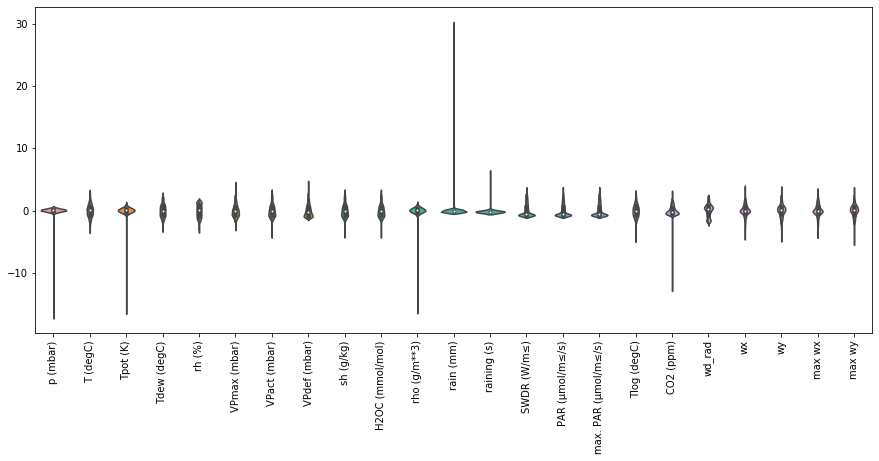

In [15]:
#visualize the entire dataset to check extreme outliers

df_scaled = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

plt.figure(figsize=(15,6))
ax = sns.violinplot(data=df_scaled)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [16]:
#2. Neural Network Modelling (Multiple Parallel Series)

In [17]:
#split the sequence

def split_sequences(dataset, n_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        end = i + n_steps
        if end > len(dataset)-1:
            break
        seq_x, seq_y = dataset[i:end], dataset[end]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

n_steps = 24 #1-day interval

x_train, y_train = split_sequences(train_df, n_steps=n_steps)
x_val, y_val = split_sequences(val_df, n_steps=n_steps)
x_test, y_test = split_sequences(test_df, n_steps=n_steps)

In [18]:
#2.1. Vanilla LSTM
#2.2. Stacked LSTM
#2.3. Bidirectional LSTM

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
n_features = x_train.shape[2]

In [21]:
#2.1. Vanilla LSTM

lstm = Sequential()

lstm.add(LSTM(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps, n_features),
             return_sequences=True))
lstm.add(Dense(n_features))
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 64)            22528     
_________________________________________________________________
dense (Dense)                (None, 24, 23)            1495      
Total params: 24,023
Trainable params: 24,023
Non-trainable params: 0
_________________________________________________________________


In [22]:
lstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [24]:
epochs=20

history = lstm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=1, verbose=2)

Epoch 1/20
1612/1612 - 13s - loss: 1.0032 - mae: 0.6172 - val_loss: 0.7791 - val_mae: 0.5803
Epoch 2/20
1612/1612 - 13s - loss: 0.7092 - mae: 0.5099 - val_loss: 0.6200 - val_mae: 0.4842
Epoch 3/20
1612/1612 - 15s - loss: 0.6313 - mae: 0.4582 - val_loss: 0.6106 - val_mae: 0.4873
Epoch 4/20
1612/1612 - 12s - loss: 0.5905 - mae: 0.4322 - val_loss: 0.5520 - val_mae: 0.4349
Epoch 5/20
1612/1612 - 12s - loss: 0.5624 - mae: 0.4167 - val_loss: 0.5495 - val_mae: 0.4401
Epoch 6/20
1612/1612 - 13s - loss: 0.5424 - mae: 0.4037 - val_loss: 0.5621 - val_mae: 0.4380
Epoch 7/20
1612/1612 - 12s - loss: 0.5246 - mae: 0.3931 - val_loss: 0.5609 - val_mae: 0.4331
Epoch 8/20
1612/1612 - 12s - loss: 0.5086 - mae: 0.3837 - val_loss: 0.5540 - val_mae: 0.4353
Epoch 9/20
1612/1612 - 12s - loss: 0.5002 - mae: 0.3826 - val_loss: 0.5574 - val_mae: 0.4291
Epoch 10/20
1612/1612 - 12s - loss: 0.4754 - mae: 0.3691 - val_loss: 0.5598 - val_mae: 0.4337
Epoch 11/20
1612/1612 - 13s - loss: 0.4572 - mae: 0.3670 - val_loss: 

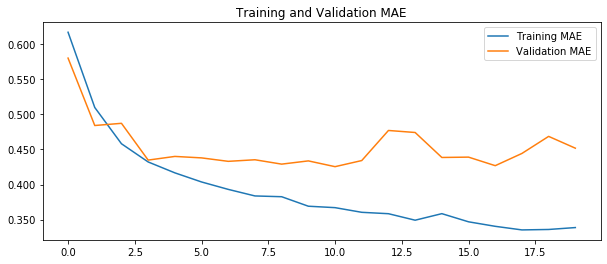

In [27]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.title('Training and Validation MAE')
plt.show()

In [29]:
#2.2. Stacked LSTM

lstm2 = Sequential()

lstm2.add(LSTM(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps, n_features),
             return_sequences=True))
lstm2.add(LSTM(32, activation='relu', kernel_initializer='he_normal',
             return_sequences=True))
lstm2.add(Dense(n_features))
lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 64)            22528     
_________________________________________________________________
lstm_4 (LSTM)                (None, 24, 32)            12416     
_________________________________________________________________
dense_2 (Dense)              (None, 24, 23)            759       
Total params: 35,703
Trainable params: 35,703
Non-trainable params: 0
_________________________________________________________________


In [30]:
lstm2.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [31]:
history2 = lstm2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=1, verbose=2)

Epoch 1/20
1612/1612 - 21s - loss: 0.8990 - mae: 0.6042 - val_loss: 0.6626 - val_mae: 0.5186
Epoch 2/20
1612/1612 - 20s - loss: 0.6761 - mae: 0.4820 - val_loss: 0.5979 - val_mae: 0.4655
Epoch 3/20
1612/1612 - 18s - loss: 0.6072 - mae: 0.4389 - val_loss: 0.5833 - val_mae: 0.4613
Epoch 4/20
1612/1612 - 18s - loss: 0.5715 - mae: 0.4153 - val_loss: 0.5398 - val_mae: 0.4240
Epoch 5/20
1612/1612 - 18s - loss: 0.5453 - mae: 0.3990 - val_loss: 0.5755 - val_mae: 0.4508
Epoch 6/20
1612/1612 - 18s - loss: 0.5234 - mae: 0.3853 - val_loss: 0.5815 - val_mae: 0.4550
Epoch 7/20
1612/1612 - 18s - loss: 0.5089 - mae: 0.3838 - val_loss: 0.5542 - val_mae: 0.4267
Epoch 8/20
1612/1612 - 18s - loss: 0.4839 - mae: 0.3649 - val_loss: 0.5953 - val_mae: 0.4613
Epoch 9/20
1612/1612 - 18s - loss: 0.4733 - mae: 0.3631 - val_loss: 0.5722 - val_mae: 0.4354
Epoch 10/20
1612/1612 - 18s - loss: 0.4483 - mae: 0.3519 - val_loss: 0.5968 - val_mae: 0.4456
Epoch 11/20
1612/1612 - 17s - loss: 0.4857 - mae: 0.3652 - val_loss: 

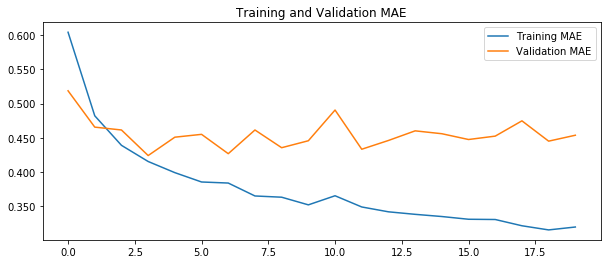

In [32]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.title('Training and Validation MAE')
plt.show()

In [ ]:
#2.3. Bidirectional LSTM

In [35]:
lstm3 = Sequential()

lstm3.add(Bidirectional(LSTM(64, activation = 'relu', kernel_initializer = 'he_normal',
                             return_sequences=True, input_shape = (n_steps, n_features))))
lstm3.add(Dense(n_features))

In [36]:
lstm3.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [37]:
history3 = lstm3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=1, verbose=2)

Epoch 1/20
1612/1612 - 17s - loss: 0.8087 - mae: 0.5543 - val_loss: 0.6065 - val_mae: 0.4667
Epoch 2/20
1612/1612 - 17s - loss: 0.5421 - mae: 0.3989 - val_loss: 0.4777 - val_mae: 0.3954
Epoch 3/20
1612/1612 - 17s - loss: 0.4816 - mae: 0.3530 - val_loss: 0.4755 - val_mae: 0.4044
Epoch 4/20
1612/1612 - 17s - loss: 0.4565 - mae: 0.3354 - val_loss: 0.4067 - val_mae: 0.3477
Epoch 5/20
1612/1612 - 17s - loss: 0.4332 - mae: 0.3195 - val_loss: 0.3747 - val_mae: 0.3167
Epoch 6/20
1612/1612 - 20s - loss: 0.4216 - mae: 0.3058 - val_loss: 0.3706 - val_mae: 0.3248
Epoch 7/20
1612/1612 - 30s - loss: 0.4357 - mae: 0.3027 - val_loss: 0.3532 - val_mae: 0.3159
Epoch 8/20
1612/1612 - 21s - loss: 0.3941 - mae: 0.2900 - val_loss: 0.3619 - val_mae: 0.3155
Epoch 9/20
1612/1612 - 18s - loss: 0.3685 - mae: 0.2861 - val_loss: 0.3815 - val_mae: 0.3220
Epoch 10/20
1612/1612 - 19s - loss: 0.3625 - mae: 0.2822 - val_loss: 0.3534 - val_mae: 0.3112
Epoch 11/20
1612/1612 - 19s - loss: 0.3613 - mae: 0.2871 - val_loss: 

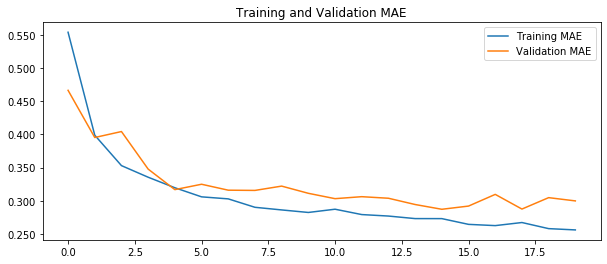

In [38]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(history3.history['mae'])
plt.plot(history3.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.title('Training and Validation MAE')
plt.show()